In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re

In [ ]:
%pip install wordcloud transformers tf-keras datasets

In [21]:
df = pd.read_csv("./enron_spam_data_github/enron_spam_data.csv")
df.groupby('Spam/Ham').describe()

Message ID                                                       \
              count          mean          std     min      25%      50%   
Spam/Ham                                                                   
ham         16545.0  11765.862315  8279.563017     0.0   5636.0  11268.0   
spam        17171.0  21763.512783  8421.126803  3672.0  16337.5  22130.0   

                            
              75%      max  
Spam/Ham                    
ham       16904.0  29215.0  
spam      29422.5  33715.0

In [24]:
df['spam'] = df['Spam/Ham'].apply(lambda x: 1 if x == 'spam' else 0)
df

,Message ID,Subject,Message,Spam/Ham,Date,spam
0,0,christmas tree farm pictures,NaN,ham,1999-12-10,0
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13,0
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14,0
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14,0
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14,0
...,...,...,...,...,...,...
33711,33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np...",spam,2005-07-29,1
33712,33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...,spam,2005-07-29,1
33713,33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...,spam,2005-07-30,1
33714,33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...,spam,2005-07-30,1


In [5]:
x_train, x_test, y_train, y_test = train_test_split(df.Message, df.spam)
x_train = x_train.fillna("")
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)
model = MultinomialNB()
model.fit(x_train_count, y_train)
x_test = x_test.fillna("")
x_test_count = cv.transform(x_test)
model.score(x_test_count, y_test)


0.9871870921817535

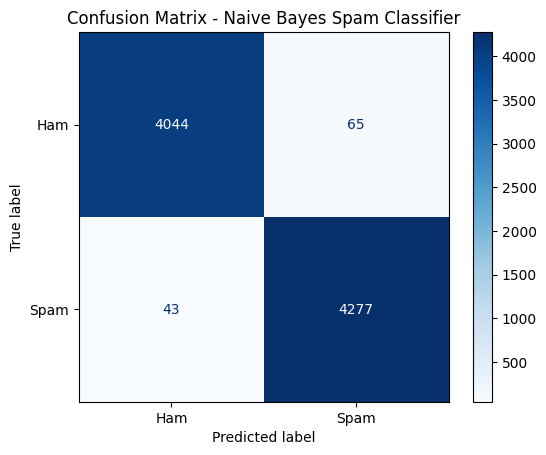

              precision    recall  f1-score   support

         Ham       0.99      0.98      0.99      4109
        Spam       0.99      0.99      0.99      4320

    accuracy                           0.99      8429
   macro avg       0.99      0.99      0.99      8429
weighted avg       0.99      0.99      0.99      8429



In [6]:
y_pred = model.predict(x_test_count)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes Spam Classifier")
plt.show()
print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))


In [ ]:
predictions = model.predict(x_test_count)

results = pd.DataFrame({
    'Message': x_test.values,
    'True Label': y_test.values,
    'Predicted': predictions
})

misclassified = results[results['True Label'] != results['Predicted']]
misclassified = misclassified.reset_index(drop=True)

for i in range(min(5, len(misclassified))):
    print(f"\nExample {i+1}:")
    print("Message:", misclassified.loc[i, 'Message'])
    print("True Label:", misclassified.loc[i, 'True Label'], "| Predicted:", misclassified.loc[i, 'Predicted'])



Example 1:
Message: your command :
subscribe frbnyrmagl vince kaminski
has been received . you must now reply to this message ( as explained
below ) to complete your subscription . the purpose of this confirmation
procedure is to check that the address listserv is about to add to the
list for your subscription is reachable . this is a typical procedure for
high - volume lists and all new subscribers are subjected to it - you are
not being singled out . every effort has been made to make this
verification as simple and painless as possible . thanks in advance for
your cooperation .
to confirm the execution of your command , simply point your browser to
the following url :
alternatively , if you have no www access , you can reply to the present
message and type " ok " ( without the quotes ) as the text of your message .
just the word " ok " - do not retype the command . this procedure will work
with any mail program that fully conforms to the internet standards for
electronic mail . if 

<Axes: xlabel='Date'>

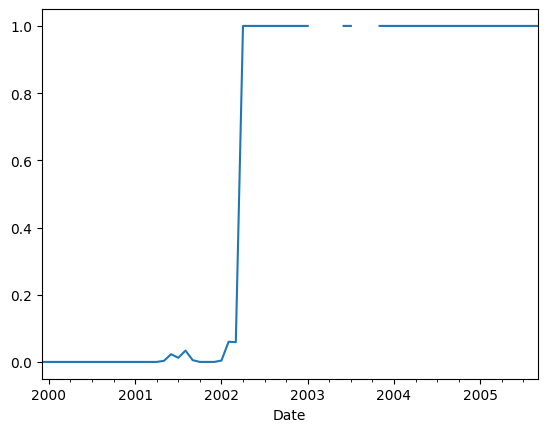

In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date').resample('ME')['spam'].mean().plot()

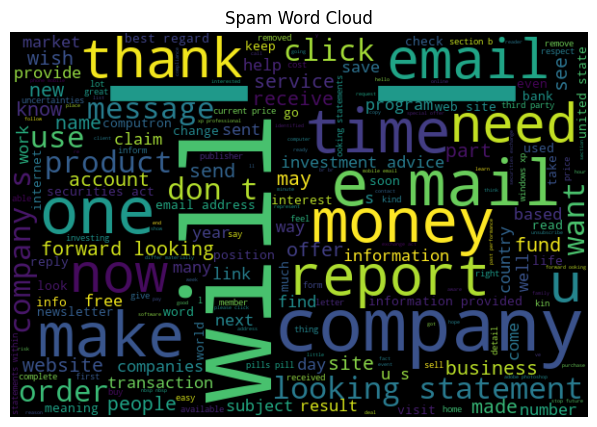

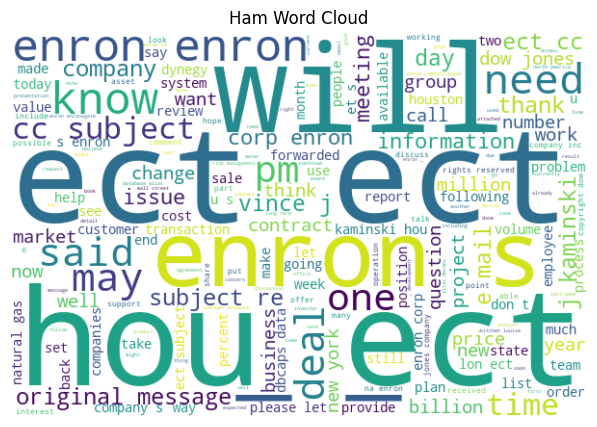

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_words = " ".join(df[df['spam'] == 1]['Message'].dropna())
ham_words = " ".join(df[df['spam'] == 0]['Message'].dropna())

wc_spam = WordCloud(width=600, height=400, background_color='black').generate(spam_words)
plt.figure(figsize=(10, 5))
plt.imshow(wc_spam, interpolation="bilinear")
plt.axis("off")
plt.title("Spam Word Cloud")
plt.show()

wc_ham = WordCloud(width=600, height=400, background_color='white').generate(ham_words)
plt.figure(figsize=(10, 5))
plt.imshow(wc_ham, interpolation="bilinear")
plt.axis("off")
plt.title("Ham Word Cloud")
plt.show()


In [6]:
email_ham = ["Hey buddy just looking to meet you for the party next week. Lemme know what should I bring."]
email_ham_count = cv.transform(email_ham)
model.predict(email_ham_count)

array([0])

In [7]:
email_spam = ["Someone tried to login to your Instagram account"]
email_spam_count = cv.transform(email_spam)
model.predict(email_spam_count)

array([1])

## With text preprocessing pipeline

In [7]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nisarg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nisarg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nisarg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def custom_tokenizer(text):
    text = re.sub(r'\W+', ' ', text.lower())
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens

cv = CountVectorizer(tokenizer=custom_tokenizer, lowercase=False)
x_train_count = cv.fit_transform(x_train)
x_test_count = cv.transform(x_test)

model = MultinomialNB()
model.fit(x_train_count, y_train)

y_pred = model.predict(x_test_count)
print("Model Accuracy:", model.score(x_test_count, y_test))



C:\Users\Nisarg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Model Accuracy: 0.985051607545379


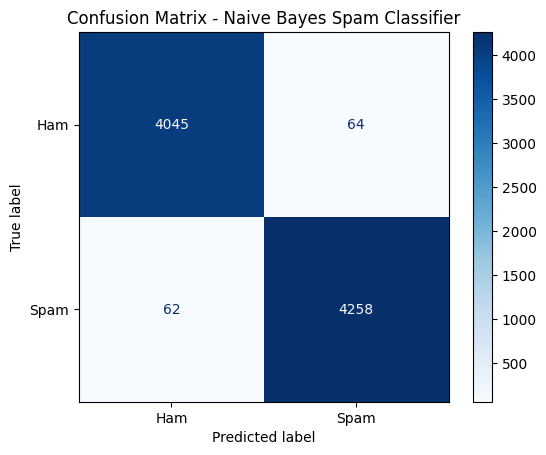

              precision    recall  f1-score   support

         Ham       0.98      0.98      0.98      4109
        Spam       0.99      0.99      0.99      4320

    accuracy                           0.99      8429
   macro avg       0.99      0.99      0.99      8429
weighted avg       0.99      0.99      0.99      8429



In [9]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes Spam Classifier")
plt.show()

print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

We don't see a drastic improvement in accuracy even with the text preprocessing pipeline as Naive Bayes is already highlye efficient at filtering spam and the difference is marginal.

## Comparing with other models

In [11]:
tfidf = TfidfVectorizer(tokenizer=custom_tokenizer, lowercase=False)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(),
    "Naive Bayes": MultinomialNB()
}

for name, clf in models.items():
    pipeline = Pipeline([
        ('tfidf', tfidf),
        ('clf', clf)
    ])
    pipeline.fit(x_train, y_train)
    preds = pipeline.predict(x_test)
    print(f"\n{name} Results:")
    print(classification_report(y_test, preds, target_names=["Ham", "Spam"]))

C:\Users\Nisarg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Logistic Regression Results:
              precision    recall  f1-score   support

         Ham       0.99      0.97      0.98      4109
        Spam       0.97      0.99      0.98      4320

    accuracy                           0.98      8429
   macro avg       0.98      0.98      0.98      8429
weighted avg       0.98      0.98      0.98      8429



C:\Users\Nisarg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



SVM Results:
              precision    recall  f1-score   support

         Ham       1.00      0.98      0.99      4109
        Spam       0.98      1.00      0.99      4320

    accuracy                           0.99      8429
   macro avg       0.99      0.99      0.99      8429
weighted avg       0.99      0.99      0.99      8429



C:\Users\Nisarg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Naive Bayes Results:
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99      4109
        Spam       0.99      0.99      0.99      4320

    accuracy                           0.99      8429
   macro avg       0.99      0.99      0.99      8429
weighted avg       0.99      0.99      0.99      8429

